In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
X_train = train.drop(columns=['label'])
Y_train = train['label']
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
test = test.to_numpy()

In [10]:
print(f'{X_train.shape[0]} veri yüklendi.')


42000 veri yüklendi.


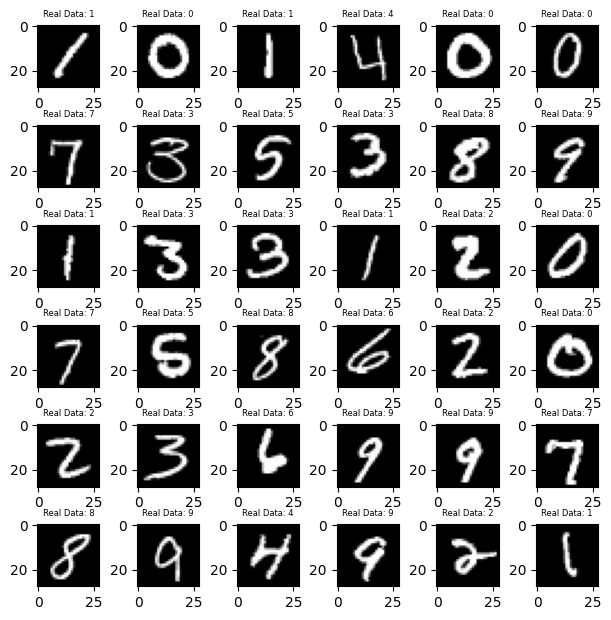

In [12]:
fig, axes = plt.subplots(6,6, figsize=(6,6))
fig.tight_layout(pad=0.1)

i = 0
for ax in axes.flat:
    img = X_train[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Real Data: {Y_train[i]}', fontsize=6)
    i += 1

plt.show()

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10) # 10 sayi var.
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.25)

Epoch 1/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 21.3099 - sparse_categorical_accuracy: 0.7323 - val_loss: 2.2216 - val_sparse_categorical_accuracy: 0.8889
Epoch 2/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5679 - sparse_categorical_accuracy: 0.9087 - val_loss: 1.1337 - val_sparse_categorical_accuracy: 0.9067
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7248 - sparse_categorical_accuracy: 0.9209 - val_loss: 0.8744 - val_sparse_categorical_accuracy: 0.9186
Epoch 4/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3739 - sparse_categorical_accuracy: 0.9464 - val_loss: 0.7220 - val_sparse_categorical_accuracy: 0.9247
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2511 - sparse_categorical_accuracy: 0.9554 - val_loss: 0.6450 - val_sparse_categorical_accuracy: 0.9259
Epoch 6/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1799 - sparse_categorical_accuracy: 0.9640 - val_loss: 0.6659 - val_sparse_categorical_accuracy: 0.9339
Ep

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


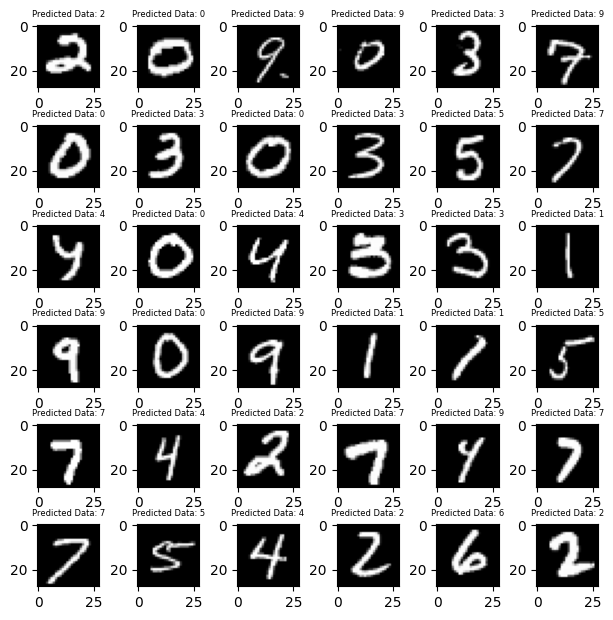

In [15]:
prediction = model.predict(test[0:36])
predicted_labels = prediction.argmax(axis=1)

fig, axes = plt.subplots(6,6, figsize=(6,6))
fig.tight_layout(pad=0.1)

i = 0
for ax in axes.flat:
    img = test[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Predicted Data: {predicted_labels[i]}', fontsize=6)
    i += 1

plt.show()

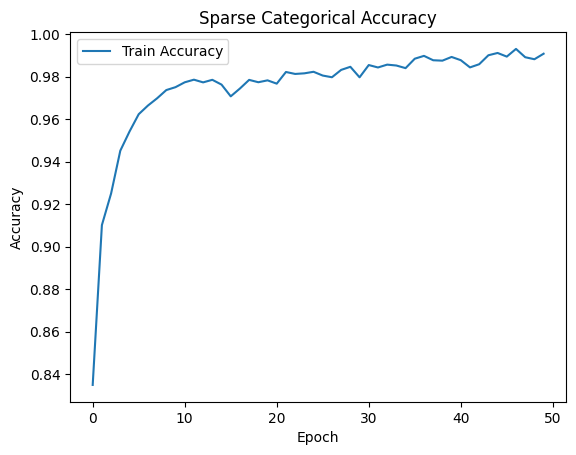

In [16]:
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')

plt.title('Sparse Categorical Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

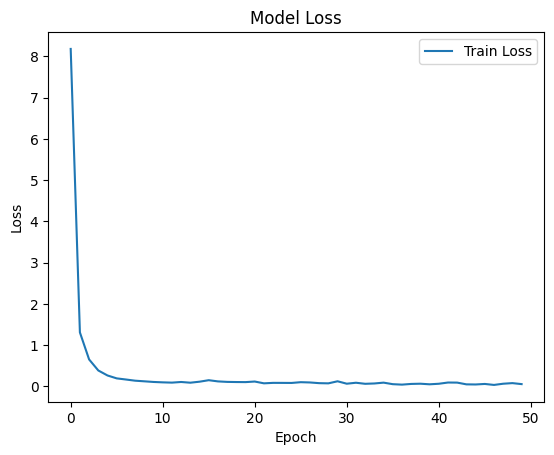

In [17]:
plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()